In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
dataset = pd.read_csv('7days.csv')

In [10]:
dataset

,Unnamed: 0,timestamp,category,action,symbolId,cardName,user_id
0,4784,2020-04-09 17:09:42.777,card,open,2603,基本資料,9
1,6285,2020-04-09 17:30:58.354,card,open,2409,法人買賣超,9
2,6286,2020-04-09 17:30:58.360,card,open,2409,現金流量表,9
3,6287,2020-04-09 17:30:58.367,card,open,2409,本淨比河流圖,9
4,6288,2020-04-09 17:30:58.373,card,open,2409,資產負債表,9
...,...,...,...,...,...,...,...
14630,8,2020-04-09 16:00:09.497,card,open,1707,即時走勢,4539
14631,7,2020-04-09 16:00:09.490,card,open,1707,新聞,4539
14632,6,2020-04-09 16:00:09.479,card,open,1707,股價K線,4539
14633,10,2020-04-09 16:00:09.506,card,open,1707,PTT批踢踢,4539


In [11]:
dataset = dataset.drop(['Unnamed: 0','timestamp','category','action','symbolId'],axis = 1)

In [12]:
dataset.head(10)

,cardName,user_id
0,基本資料,9
1,法人買賣超,9
2,現金流量表,9
3,本淨比河流圖,9
4,資產負債表,9
5,本益比河流圖,9
6,現金流量表,9
7,資產負債表,9
8,損益表,9
9,法人買賣超,9


In [16]:
dataset = dataset.groupby(['user_id','cardName']).size().unstack(fill_value = 0).reset_index(drop = True)

In [18]:
from sklearn.cluster import KMeans

In [46]:
wcss = []
for i in range(1,30):
    kmeans = KMeans(n_clusters = i , max_iter = 300 , n_init = 10 , init = 'k-means++',random_state = 0)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)

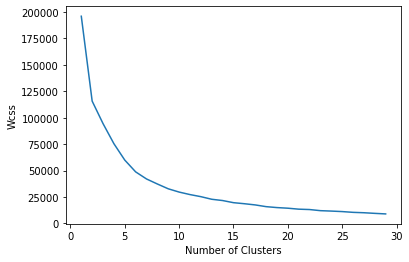

In [47]:
plt.plot(range(1,30),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [48]:
kmeans = KMeans(n_clusters = 25 , max_iter = 300 , n_init = 10 , init = 'k-means++',random_state = 0)
y_kmeans = kmeans.fit_predict(dataset)

In [49]:
print(y_kmeans)

[17 17 18  0 12  0  0  0  0 24 18  9 18  0 24  2  0 21  0  0 18  6  2  9
 12  5  0  9 18  0  0  0  6 18  0 10  0 15  0 18  6 15  0  9  6 11  0 18
  0 18 18 10 11  2  0  0  0  9  6  0  9  2  0  2 18  9  6  4  0 18  0  6
  9  0  9  0  0  0  9 18 18  8  6  9  6  0 17  9  0  9  0  9  0  9 18  0
 10 23  6 18  0 24  0 18  0  0 18 18  0  0  0  0 12  0  0 24 17  0  9 18
  3 15 18 18 18  0  0  9  9  0 17  9  0  9  2  9 18  0  0  9  9 18 18  9
 18  6  2 20  9  2  9 13  0  9  0 18  9  0  6  2  0  0  0 18  0  9 18 18
 18  0 12  9  1  9 19  0 18  9  6  0  0  6  0  0  0  0  0  0 17  0  9 16
  0 18 18 18  2  0  0  9  0 15  0  0  0  0  7  9  9  9 18  0  0 18 18  0
  0  2  0  0  0  9  9 18 18  3  0  6  0  9  0 14  0  0  6  6  0  0  9 22
  0  0  0  0  9 18 18  0 18  7  9  0  9  0  0  0  9  0  0  0  0  0  0  2
  3  9  9  0 24  0  0 18  9  0 18  0  0  0 18 18  9  0  0  0 24  0  9  0
 18 18 18 18 18  9  9 18  0  0  0  6  0  0  9  0  0  0 18  0  0  0 12  0
 12 18  0  0  0  0  0 18  9  0  9 24  6  0  6  9  9

In [50]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(dataset)
X_embedded.shape

(370, 2)

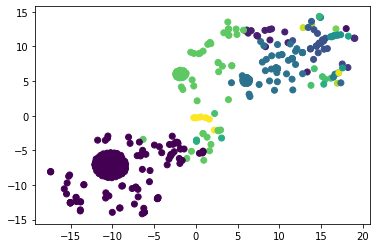

In [51]:
plt.scatter(X_embedded[:,0],X_embedded[:,1],c = y_kmeans)